In [1]:
# Import the modules

import numpy as no
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
data = pd.read_csv('D:/Study/DataScience/Data/MachineLearningData/health_data.csv')

In [27]:
data.head()

,BIO_SEX,AGE,TREG1,ALCEVR1,ALCPROBS1,MAREVER1,COCEVER1,INHEVER1,CIGAVAIL,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
1,2.0,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
3,1.0,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
5,1.0,14.509589,0.0,0.0,0,0,0,0,0.0,8.0,41.0,3.0,0,0.0,27.0,2.666667,0.0,23.7,3.0,13.0
6,1.0,13.676712,0.0,0.0,0,0,0,0,1.0,4.0,42.0,5.0,0,7.0,18.0,2.500000,0.0,24.7,6.0,13.0
7,1.0,15.178082,1.0,1.0,0,1,0,0,1.0,4.0,40.0,8.0,1,6.0,20.0,1.500000,0.0,22.3,10.0,14.0


In [8]:
data.columns = map(str.upper, data.columns)
data.dropna( inplace= True)

In [28]:
from sklearn.preprocessing import StandardScaler

data2 = data.copy()

In [29]:
# Scale the data for cluster analysis

sc = StandardScaler()

In [30]:
df_scaled = pd.DataFrame(sc.fit_transform(data2),columns = data2.columns)

In [31]:
df_scaled.head()

,BIO_SEX,AGE,TREG1,ALCEVR1,ALCPROBS1,MAREVER1,COCEVER1,INHEVER1,CIGAVAIL,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,0.958897,1.890089,2.161768,0.947683,0.707020,-0.564215,-0.184838,-0.265045,1.530138,1.286259,-1.104733,-0.238134,-0.338103,0.670775,-1.230181,-0.624026,-0.204678,0.277586,0.806442,0.766295
1,-1.042865,2.535325,2.161768,-1.055206,-0.412003,1.772375,5.410151,3.772943,1.530138,1.590171,1.122320,0.919248,2.957682,0.386277,-1.811019,-1.056491,-0.204678,-1.484243,-0.085920,0.287126
2,-1.042865,-1.274384,-0.462584,-1.055206,-0.412003,-0.564215,-0.184838,-0.265045,-0.653536,-0.081345,0.008793,0.533454,-0.338103,-0.751716,-0.262119,-0.191559,-0.204678,0.430788,-0.978282,-0.192042
3,-1.042865,-1.810318,-0.462584,-1.055206,-0.412003,-0.564215,-0.184838,-0.265045,1.530138,-0.689169,0.194381,1.305042,-0.338103,1.239771,-2.004631,-0.407792,-0.204678,0.813795,-0.085920,-0.192042
4,-1.042865,-0.844227,2.161768,0.947683,-0.412003,1.772375,-0.184838,-0.265045,1.530138,-0.689169,-0.176794,2.462425,2.957682,0.955273,-1.617406,-1.705190,-0.204678,-0.105420,1.103896,0.287126


In [32]:
# Split the data into training and testing datasets

from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df_scaled, test_size = 0.3, random_state = 0)

In [33]:
# Build a K Means model

from sklearn.cluster import KMeans

In [39]:
# Draw an Elbow plot to determine the number of clusters

wss = []

n = range(1,21)

for i in n:
    km = KMeans(n_clusters=i)
    km.fit(x_train)
    wss.append(km.inertia_)

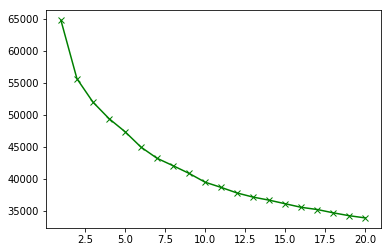

In [44]:
plt.plot(n, wss, 'x-', color = 'green' )

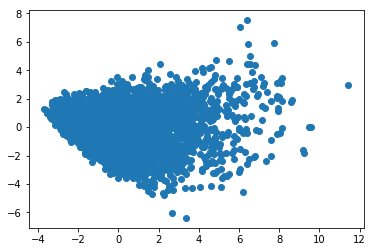

In [54]:
# Use PCA to plot the clusters in 2-dimensions

from sklearn.decomposition import PCA

pca = PCA(2)

plot_columns = pca.fit_transform(df_scaled)

plt.scatter( x = plot_columns[:,0], y = plot_columns[:, 1])

In [53]:
len(km.labels_)

3220